In [5]:
import numpy as np
from PIL import Image
from scipy.misc import imread, imshow
from scipy import ndimage
import matplotlib.pyplot as plt


def BilinearInterpolation(imArr, posX, posY):

    X_int = int(posX)
    Y_int = int(posY)
    X_float = posX - X_int
    Y_float = posY - Y_int
    X_int_inc = min(X_int+1, imArr.shape[0]-1)
    Y_int_inc = min(Y_int+1, imArr.shape[1]-1)

    bl = imArr[X_int, Y_int]
    br = imArr[X_int_inc, Y_int]
    tl = imArr[X_int, Y_int_inc]
    tr = imArr[X_int_inc, Y_int_inc]

    b = X_float*br + (1. - X_float)*bl
    t = X_float*tr + (1. - X_float)*tl
    result = int(Y_float*t + (1. - Y_float)*b + 0.5)

    return result


def kNearest(imArr, k, posX, posY):

	summ = 0
	values = []
	out = []
	for r in range(max(0, int(posX)), min(imArr.shape[0], int(posX+k))):
		for c in range(max(0, int(posY-k)), min(imArr.shape[1], int(posY+k))):
			difference_x = posX - r
			difference_y = posY - c
			sqr = float(difference_x**2 + difference_y**2)
			values.append(imArr[r,c]) # яркость в точке
			out.append(sqr) # расстояния до точек

	values = np.array(values)
	out = np.array(out)
	temp = np.vstack([out, values])
	out = np.argsort(out)
	
	i = 0
	while i < k:
		elem = out[i]
		summ += temp[1, elem]
		i += 1

	result = summ/k
	return result


path = input("Path to picture: ")
img = Image.open(path, 'r')
img = img.convert('L') # преобразование в изображение в оттенках серого
imArr = np.asarray(img)
coef = 2. 
newShape = list(map(int, [imArr.shape[0]*coef, imArr.shape[1]*coef]))
resultImg = np.empty(newShape, dtype = np.uint8)
rowScale = float(imArr.shape[0]) / float(resultImg.shape[0])
colScale = float(imArr.shape[1]) / float(resultImg.shape[1])

def resize():
    methods = {'1': 'K nearest neighborg', '2': 'Bilinear interpolation'}
    for method in methods:
        print(method, methods[method])
    key = input("Enter method number: ")
    if key == '1':
                k = input("Enter k: ")
                k = int(k)
                for r in range(resultImg.shape[0]):
                    for c in range(resultImg.shape[1]):
                        old_r = r * rowScale # координата в начальном изображении
                        old_c = c * colScale
                        resultImg[r, c] = kNearest(imArr, k, old_r, old_c)
     
                plt.imshow(np.uint8(resultImg), cmap = 'gray')
    
    elif key == '2':
                for r in range(resultImg.shape[0]):
                    for c in range(resultImg.shape[1]):
                        old_r = r * rowScale
                        old_c = c * colScale
                        resultImg[r, c] = BilinearInterpolation(imArr, old_r, old_c)
                plt.imshow(np.uint8(resultImg), cmap = 'gray')

Path to picture: 2.jpeg


1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 1
Enter k: 2


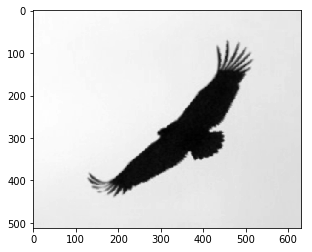

In [2]:
resize()

1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 1
Enter k: 1


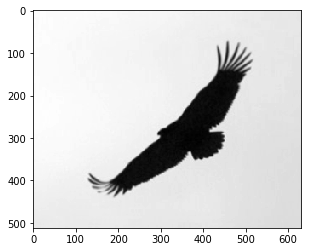

In [3]:
resize()

1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 2


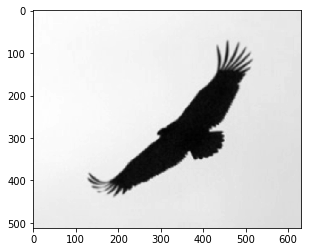

In [4]:
resize()

1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 2


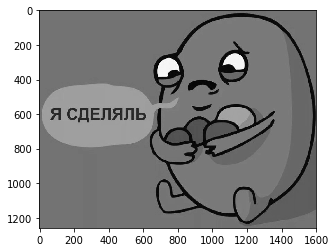

In [6]:
resize()